In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Data

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
train.shape

(42000, 785)

In [5]:
test = pd.read_csv("data/test.csv")
test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [7]:
test.shape

(28000, 784)

In [9]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
train.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Model training

In [8]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [24]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
pred_y = dtree.predict(X_test)

In [32]:
print(classification_report(pred_y, y_test))
print("\n")

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1198
           1       0.93      0.93      0.93      1430
           2       0.81      0.82      0.82      1237
           3       0.81      0.81      0.81      1280
           4       0.88      0.82      0.85      1298
           5       0.80      0.80      0.80      1113
           6       0.89      0.90      0.89      1219
           7       0.89      0.90      0.90      1299
           8       0.76      0.76      0.76      1229
           9       0.83      0.83      0.83      1297

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600





In [36]:
fig, ax = plt.subplots(figsize=(100,100))
plot_tree(dtree, ax=ax)
fig.savefig("tree.png")

# Model tuning

In [70]:
params_dist = { 
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,40,50],
    "splitter":["best", "random"]
}

In [71]:
grid = GridSearchCV(dtree, param_grid=params_dist,cv=10, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'splitter': ['best', 'random']})

In [75]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'splitter': 'best'}

In [76]:
grid.best_score_

np.float64(0.858095238095238)

In [77]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [78]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [79]:
pred_y = dtree.predict(X_test)

In [81]:
print(classification_report(pred_y, y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1214
           1       0.95      0.94      0.94      1436
           2       0.82      0.84      0.83      1230
           3       0.82      0.83      0.83      1261
           4       0.86      0.84      0.85      1249
           5       0.81      0.79      0.80      1140
           6       0.88      0.88      0.88      1240
           7       0.90      0.90      0.90      1314
           8       0.81      0.81      0.81      1224
           9       0.82      0.83      0.82      1292

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600



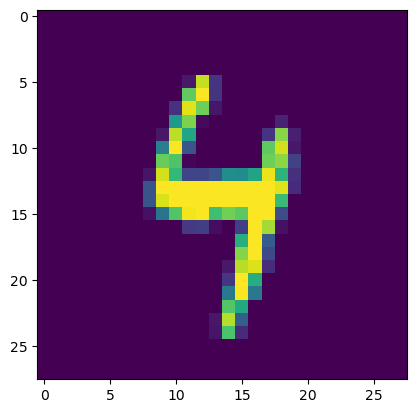

In [87]:
plt.imshow(np.array(X_test.iloc[50]).reshape(28,28))

In [90]:
y_test.iloc[50]

np.int64(4)

In [93]:
pred_y[50]

np.int64(4)

# Testing on test data

In [94]:
test_pred = dtree.predict(test)

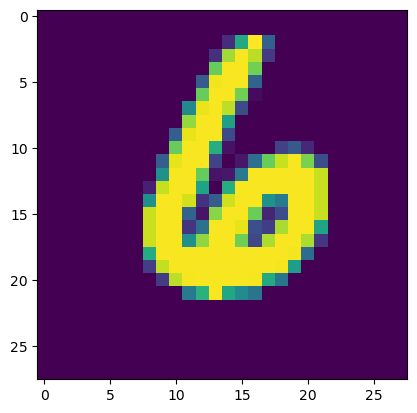

In [96]:
plt.imshow(np.array(test.iloc[50]).reshape(28,28))

In [126]:
submission = pd.DataFrame(test_pred, columns=["Label"])
submission["ImageId"] = [i for i in range(1, len(test_pred)+1)]
submission.set_index("ImageId", inplace=True)

In [127]:
submission.to_csv("submission.csv")